In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
sn.set()
import matplotlib.font_manager as fm
fl = fm.FontProperties(fname ="C:\Windows\Fonts\malgun.ttf").get_name()
plt.rc('font',family=fl)
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.stattools as tools
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.compat import lzip
import statsmodels.stats as sm_stats
import statsmodels.stats.outliers_influence as oi
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.stats.outliers_influence as oi
import statsmodels.stats as sm_stats

In [3]:
df=pd.read_csv('data5.csv',encoding="UTF-8",index_col=0)
df.head(10)

,2010crime,2010population,2010grand,2010population_density,2010foreigner,2010drink,2010smoke,2010academe,2010grdp,2011crime,...,2015grdp,2016crime,2016population,2016grand,2016population_density,2016foreigner,2016drink,2016smoke,2016academe,2016grdp
지역/연도,,,,,,,,,,,,,,,,,,,,,
서울/강남,37863,570095,44095,14418,12328,11.3,19.2,3.2,4601,38915,...,5414,14152,567115,61822,14357,9762,13.9,17.4,3.7,5514
서울/강동,12589,491871,39413,20011,6444,19.9,26.7,1.5,582,13814,...,640,15140,444168,53121,18063,7006,13.8,19.5,1.6,668
서울/강북,11355,346520,41641,14677,4497,12.5,26.0,0.8,252,11610,...,234,12725,327195,53964,13866,5243,19.2,21.5,0.7,246
서울/강서,17778,574127,50189,13861,8309,12.7,22.3,1.2,706,18808,...,873,9267,595485,70889,14371,10309,14.0,19.6,1.2,952
서울/관악,16182,531434,50350,17972,21511,18.7,23.8,1.0,447,17000,...,470,13869,506851,66659,17141,27794,14.2,22.5,0.9,475
서울/광진,13443,375463,32034,22008,14857,14.7,25.3,1.2,513,13663,...,503,13659,357215,41292,20935,19231,17.4,20.5,1.2,526
서울/구로,13986,423736,38829,21060,32391,18.2,23.1,1.0,960,16475,...,1017,13329,417551,55159,20754,46229,14.9,22.8,1.0,1077
서울/금천,9472,245195,23675,18861,21368,22.0,26.5,1.0,1130,10740,...,1222,11615,235386,31976,18080,28434,20.5,25.6,0.9,1326
서울/노원,12631,611230,56977,17247,5630,17.3,24.5,0.6,413,12830,...,445,10857,567581,70819,16016,5444,18.0,19.9,1.4,461


In [8]:
plt_y = [np.mean(df['2010crime']/df['2010population'])*100,
        np.mean(df['2011crime']/df['2011population'])*100,
        np.mean(df['2012crime']/df['2012population'])*100,
        np.mean(df['2013crime']/df['2013population'])*100,
        np.mean(df['2014crime']/df['2014population'])*100,
        np.mean(df['2015crime']/df['2015population'])*100,
        np.mean(df['2016crime']/df['2016population'])*100]
plt_y
np.max(plt_y)

[3.82706858849707,
 4.032997797583936,
 4.581467607321126,
 4.712449447145789,
 4.567410103246846,
 4.701849764184727,
 4.542723137187989]

4.712449447145789

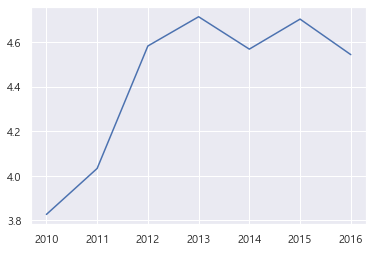

In [14]:
plt_x = ['2010','2011','2012','2013','2014','2015','2016']
plt.plot(plt_x,plt_y)
plt.show()

In [192]:
df_index = df.index
df_columns =['2013crime','2013population','2013grand','2013population_density','2013foreigner','2013drink','2013smoke','2013academe','2013grdp']
df1 =df[df_columns]
df1.head()
df1.tail()

,2013crime,2013population,2013grand,2013population_density,2013foreigner,2013drink,2013smoke,2013academe,2013grdp
지역/연도,,,,,,,,,
서울/강남,13568,563599,53300,14268,12642,17.4,23.2,3.6,4835
서울/강동,15470,483379,47722,19660,7761,17.4,23.2,1.5,612
서울/강북,12573,338707,48465,14354,5114,19.7,24.1,0.7,246
서울/강서,10332,569070,59330,13737,10066,16.2,22.2,1.2,794
서울/관악,15056,518028,59333,17519,25920,19.1,23.0,0.9,465


,2013crime,2013population,2013grand,2013population_density,2013foreigner,2013drink,2013smoke,2013academe,2013grdp
지역/연도,,,,,,,,,
춘천,7530,205479,39467,246,3586,18.3,24.7,1.7,545
충주,7577,189680,32525,212,3718,14.5,24.3,1.6,505
파주,5695,165837,45783,597,10455,20.5,26.2,1.1,1200
평택,5214,137204,47683,966,16950,20.0,24.0,1.4,2103
포항,4482,125844,58746,460,5474,17.8,23.5,1.6,1687


In [173]:
earth = round(df1['2013population']/df1['2013population_density'],2)

In [209]:
df2 = pd.DataFrame({'foreigner':(df1['2013foreigner']/(df1['2013population']))*100,
                    'grand': (df1['2013grand']/df1['2013population'])*100,
                    'grdp' : (df1['2013grdp']/df1['2013population'])*1000,
                    'drink':(df['2013drink']),
                    'smoke':(df['2013smoke']),
                    'academe':(df['2013academe']),
                    'population_density' : (df['2013population_density']),
                    'crime':np.log((df1['2013crime']/df1['2013population'])*100)})
df2

,foreigner,grand,grdp,drink,smoke,academe,population_density,crime
지역/연도,,,,,,,,
서울/강남,2.243084,9.457079,8.578794,17.4,23.2,3.6,14268,0.878541
서울/강동,1.605572,9.872584,1.266087,17.4,23.2,1.5,19660,1.163272
서울/강북,1.509860,14.308827,0.726291,19.7,24.1,0.7,14354,1.311586
서울/강서,1.768851,10.425782,1.395259,16.2,22.2,1.2,13737,0.596413
서울/관악,5.003591,11.453628,0.897635,19.1,23.0,0.9,17519,1.066917
...,...,...,...,...,...,...,...,...
춘천,1.745191,19.207316,2.652339,18.3,24.7,1.7,246,1.298721
충주,1.960143,17.147301,2.662379,14.5,24.3,1.6,212,1.384949
파주,6.304383,27.607229,7.236021,20.5,26.2,1.1,597,1.233753


In [210]:
df3 = df1.drop(df1.columns[[0,1,2,3,4,5,6,7,8]],axis = 1)

In [211]:
df2013 = df3.join(df2)
df2013

,foreigner,grand,grdp,drink,smoke,academe,population_density,crime
지역/연도,,,,,,,,
서울/강남,2.243084,9.457079,8.578794,17.4,23.2,3.6,14268,0.878541
서울/강동,1.605572,9.872584,1.266087,17.4,23.2,1.5,19660,1.163272
서울/강북,1.509860,14.308827,0.726291,19.7,24.1,0.7,14354,1.311586
서울/강서,1.768851,10.425782,1.395259,16.2,22.2,1.2,13737,0.596413
서울/관악,5.003591,11.453628,0.897635,19.1,23.0,0.9,17519,1.066917
...,...,...,...,...,...,...,...,...
춘천,1.745191,19.207316,2.652339,18.3,24.7,1.7,246,1.298721
충주,1.960143,17.147301,2.662379,14.5,24.3,1.6,212,1.384949
파주,6.304383,27.607229,7.236021,20.5,26.2,1.1,597,1.233753


In [212]:
df2013 = df2013[['crime','drink','smoke','academe',
          'foreigner','grand','grdp','population_density']]

In [65]:
df2013 = df2013.astype({'2015population_density':'float'})

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

Text(0.5, 1.0, '고위험음주율')

Text(0.5, 1.0, '흡연율')

Text(0.5, 1.0, '학원수')

Text(0.5, 1.0, 'GRDP')

Text(0.5, 1.0, '외국인')

Text(0.5, 1.0, '노인인구')

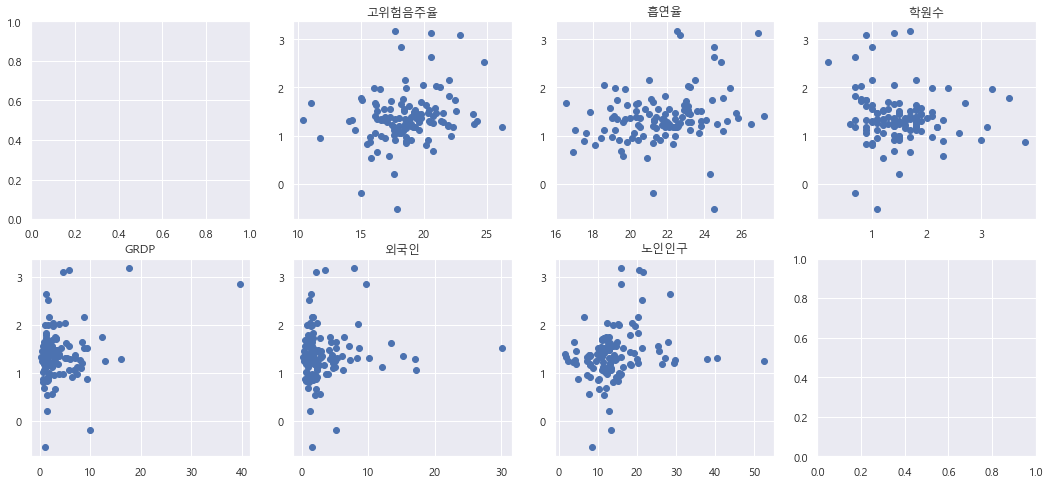

In [130]:
fig, ax = plt.subplots(2,4, figsize =(18,8))
#ax[0,0].scatter(df2010['2010population_density'],df2010['2010crime'])
#ax[0,0].set_title('인구밀도')
ax[0,1].scatter(df2013['drink'],df2013['crime'])
ax[0,1].set_title('고위험음주율')
ax[0,2].scatter(df2013['smoke'],df2013['crime'])
ax[0,2].set_title('흡연율')
ax[0,3].scatter(df2013['academe'],df2013['crime'])
ax[0,3].set_title('학원수')
ax[1,0].scatter(df2013['grdp'],df2013['crime'])
ax[1,0].set_title('GRDP')
ax[1,1].scatter(df2013['foreigner'],df2013['crime'])
ax[1,1].set_title('외국인')
ax[1,2].scatter(df2013['grand'],df2013['crime'])
ax[1,2].set_title('노인인구')
plt.show()

In [213]:
corr2013 = df2013.corr(method='spearman').round(2)
corr2013

,crime,drink,smoke,academe,foreigner,grand,grdp,population_density
crime,1.00,0.04,0.14,-0.09,0.03,0.26,0.16,-0.07
drink,0.04,1.00,0.32,-0.19,-0.01,0.17,-0.07,-0.21
smoke,0.14,0.32,1.00,-0.12,0.00,0.30,0.04,-0.18
academe,-0.09,-0.19,-0.12,1.00,-0.16,-0.11,0.14,-0.23
foreigner,0.03,-0.01,0.00,-0.16,1.00,0.35,0.70,0.15
grand,0.26,0.17,0.30,-0.11,0.35,1.00,0.40,-0.01
grdp,0.16,-0.07,0.04,0.14,0.70,0.40,1.00,-0.19
population_density,-0.07,-0.21,-0.18,-0.23,0.15,-0.01,-0.19,1.00


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


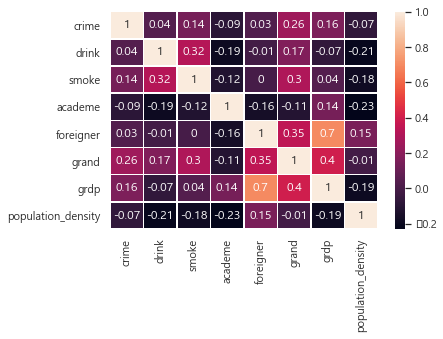

In [214]:
sn.heatmap(data = corr2013, annot=True, linewidths = 0.5)
plt.show()

In [199]:
class static():
    def number(self, a):
        print('표본개수 :{0}'.format(len(a)))
        print('평균 :{0}'.format(np.mean(a)))
        print('표준편차 :{0}'.format(np.std(a)))
        print('최대값 :{0}'.format(np.max(a)))
        print('최소값 :{0}'.format(np.min(a)))
        plt.figure(1)
        plt.hist(a)
        plt.show()

In [200]:
statics = static()

범죄율
표본개수 :117
평균 :1.3786663093642317
표준편차 :0.5376826508877582
최대값 :3.169559022881747
최소값 :-0.530454785854968


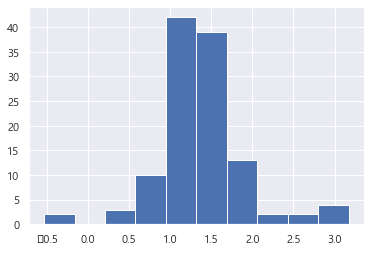

None


In [201]:
print('범죄율')
print(statics.number(df2013['crime']))

외국인 인구비중
표본개수 :117
평균 :0.7688671127910547
표준편차 :0.9112063697102817
최대값 :3.4029550642818958
최소값 :-1.567405508244177


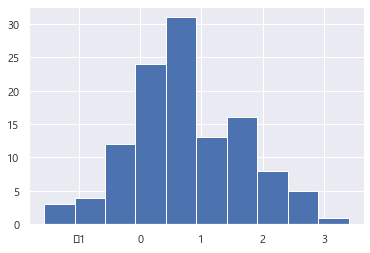

None


In [144]:
print('외국인 인구비중')
print(statics.number(df2013['foreigner']))

노인 인구비중
표본개수 :117
평균 :-208.05265683157717
표준편차 :54.742793062936336
최대값 :-64.44766154577832
최소값 :-407.7805075172221


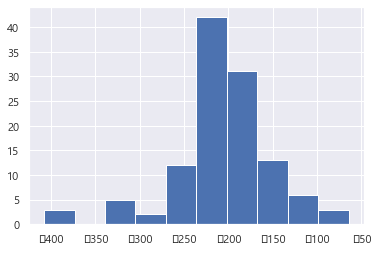

In [145]:
print('노인 인구비중')
statics.number(df2013['grand'])

흡연율
표본개수 :117
평균 :21.71282051282051
표준편차 :2.1918083101948147
최대값 :27.2
최소값 :16.5


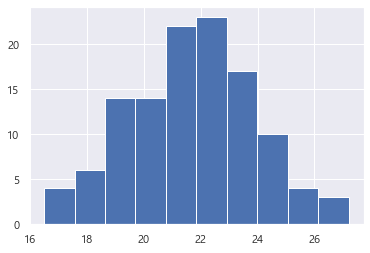

In [75]:
print('흡연율')
statics.number(df2013['smoke'])

고위험 음주율
표본개수 :117
평균 :18.625641025641027
표준편차 :2.6292618263458074
최대값 :26.2
최소값 :10.4


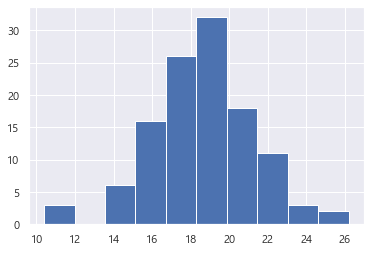

In [76]:
print('고위험 음주율')
statics.number(df2013['drink'])

GRDP
표본개수 :117
평균 :2.052339679007634
표준편차 :1.6696253437560211
최대값 :6.213000381034095
최소값 :-2.2169010388115233


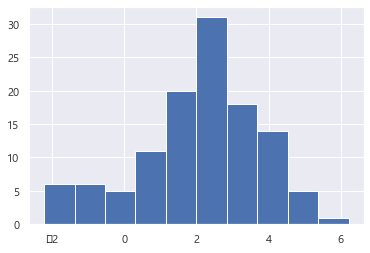

In [181]:
print('GRDP')
statics.number(df2013['grdp'])

학원수
표본개수 :117
평균 :1.5119658119658124
표준편차 :0.601872064260472
최대값 :3.8
최소값 :0.2


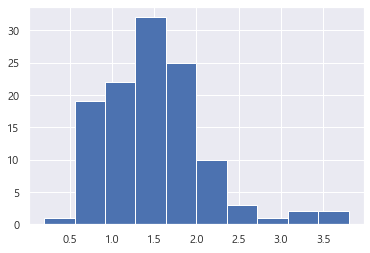

In [78]:
print('학원수')
statics.number(df2013['academe'])

인구밀도
표본개수 :117
평균 :8.093911884625676
표준편차 :1.550863016334806
최대값 :10.234265033343494
최소값 :4.804021044733257


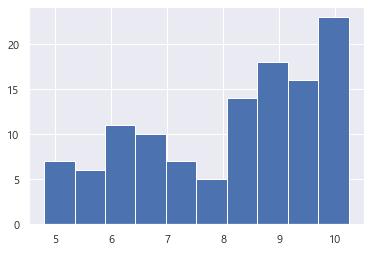

In [118]:
print('인구밀도')
statics.number(df2013['population_density'])

In [103]:
df2013.describe().T

,count,mean,std,min,25%,50%,75%,max
foreigner,117.0,28.359671,95.320679,0.043508,1.629288,3.452987,17.411301,903.169396
grand,117.0,14.265076,7.550725,1.694462,10.440854,12.900823,15.970475,52.493721
grdp,117.0,1011.820513,935.221785,35.000000,407.000000,649.000000,1222.000000,5414.000000
drink,117.0,18.625641,2.640571,10.400000,16.900000,18.500000,20.300000,26.200000
smoke,117.0,21.712821,2.201235,16.500000,20.300000,21.800000,23.100000,27.200000
academe,117.0,1.511966,0.604461,0.200000,1.100000,1.500000,1.800000,3.800000
population_density,117.0,7383.709402,7145.486350,122.000000,703.000000,5140.000000,12623.000000,27841.000000
crime,117.0,1.378666,0.539995,-0.530455,1.118491,1.328820,1.552213,3.169559


# OLS
- log를 취했습니다.

In [222]:
X = ['grdp','smoke'] 
reg =sm.OLS((df2013['crime']),df2013[X],missing='drop').fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              463.9
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                    8.82e-56
Time:                        17:09:30   Log-Likelihood:                         -83.191
No. Observations:                 117   AIC:                                      170.4
Df Residuals:                     115   BIC:                                      175.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [251]:
#X = ['2010drink','2010smoke','2010academe',
#          '2010foreigner','2010grand','2010grdp']
X = ['smoke','academe','grdp'] 
reg =sm.OLS((df2013['crime']),df2013[X],missing='drop').fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              308.8
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                    1.49e-54
Time:                        17:15:32   Log-Likelihood:                         -82.814
No. Observations:                 117   AIC:                                      171.6
Df Residuals:                     114   BIC:                                      179.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
X1 = ['smoke',
          'grand','grdp']
reg1 =sm.OLS((df2013['crime']),df2013[X1],missing='drop').fit()

In [37]:
print(reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.882
Method:                 Least Squares   F-statistic:                              293.5
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                    1.94e-53
Time:                        16:20:41   Log-Likelihood:                         -85.157
No. Observations:                 117   AIC:                                      176.3
Df Residuals:                     114   BIC:                                      184.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [85]:
features = 'academe + grand + grdp + foreigner + smoke + drink '

In [86]:
features

'academe + grand + grdp + foreigner + smoke + drink '

In [88]:
y, X = dmatrices( 'crime~'+ features, df2013, return_type='dataframe')

In [89]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif
vif['features'] = X.columns
vif

,VIF Factor
0,172.875554
1,1.210610
2,1.086000
3,1.109672
4,1.107147
5,1.205214
6,1.198950


,VIF Factor,features
0,172.875554,Intercept
1,1.210610,academe
2,1.086000,grand
3,1.109672,grdp
4,1.107147,foreigner
5,1.205214,smoke
6,1.198950,drink


In [92]:
name = ['Jarque-Beta','Chi^2 two-tail prob','Skew','Kurtosis']
jarque=sms.jarque_bera(reg1.resid)
lzip(name,jarque)

[('Jarque-Beta', 45.13543583613241),
 ('Chi^2 two-tail prob', 1.5811192967164063e-10),
 ('Skew', -0.1461338185777521),
 ('Kurtosis', 6.028717644320224)]

((array([-2.51766264, -2.18797753, -1.99804211, -1.86093788, -1.75188371,
         -1.66039676, -1.58101103, -1.51049811, -1.44678472, -1.3884565 ,
         -1.33450338, -1.28417768, -1.23690959, -1.19225441, -1.149858  ,
         -1.1094335 , -1.07074507, -1.03359631, -0.99782179, -0.96328078,
         -0.92985244, -0.89743218, -0.86592881, -0.83526226, -0.80536182,
         -0.77616466, -0.74761465, -0.71966143, -0.69225957, -0.66536793,
         -0.6389491 , -0.6129689 , -0.58739603, -0.56220168, -0.53735927,
         -0.51284418, -0.48863352, -0.46470597, -0.44104159, -0.41762168,
         -0.39442864, -0.37144588, -0.34865769, -0.32604915, -0.30360607,
         -0.28131491, -0.25916267, -0.2371369 , -0.21522558, -0.19341713,
         -0.17170029, -0.15006414, -0.12849802, -0.1069915 , -0.08553436,
         -0.06411654, -0.04272809, -0.02135917,  0.        ,  0.02135917,
          0.04272809,  0.06411654,  0.08553436,  0.1069915 ,  0.12849802,
          0.15006414,  0.17170029,  0.

Text(0.5, 1.0, 'Residual Q-Q Plot')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


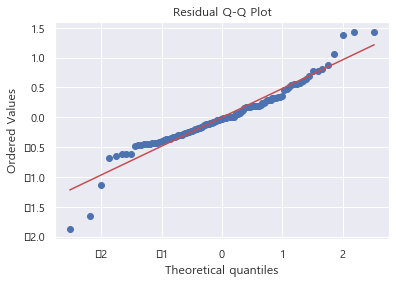

In [47]:
stats.probplot(reg.resid, dist = 'norm', plot = plt)
plt.title('Residual Q-Q Plot')

In [48]:
name = ['Lagrange multiplier static','p-value','f-value','f p-value']
BPtest = sms.het_breuschpagan(reg1.resid, reg1.model.exog)
lzip(name,BPtest)

[('Lagrange multiplier static', 22.59672892707495),
 ('p-value', 1.2393177188251626e-05),
 ('f-value', 9.095825700420217),
 ('f p-value', 1.899807277611909e-05)]

In [101]:
name = ['Lagrange multiplier static','p-value','f-value','f p-value']
Whitetest=sms.het_white(reg.resid, reg.model.exog)
lzip(name, Whitetest)

AssertionError: 

In [239]:
X2 = ['smoke','grdp']
reg2 =sm.OLS((df2013['crime']),df2013[X2],missing='drop').fit(cov_type = 'HC0')
print(reg2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              460.5
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                    1.28e-55
Time:                        17:12:20   Log-Likelihood:                         -83.191
No. Observations:                 117   AIC:                                      170.4
Df Residuals:                     115   BIC:                                      175.9
Df Model:                           2                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [226]:
name = ['LM-stat','LM:p-value','F-value','F:p-value']
bg_t = sm_diagnostic.acorr_breusch_godfrey(reg1,nlags = 2)
print(pd.DataFrame(lzip(name, bg_t)))

            0         1
0     LM-stat  0.273567
1  LM:p-value  0.872159
2     F-value  0.092350
3   F:p-value  0.911856


In [227]:
print('초기모델 : ',oi.reset_ramsey(reg, degree=2))

초기모델 :  <F test: F=array([[0.00751314]]), p=0.9310792393143762, df_denom=114, df_num=1>


In [240]:
reg3 = reg2.get_robustcov_results(cov_type = 'HAC',maxlags =1 )
print(reg3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  crime   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              536.3
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                    4.96e-59
Time:                        17:12:21   Log-Likelihood:                         -83.191
No. Observations:                 117   AIC:                                      170.4
Df Residuals:                     115   BIC:                                      175.9
Df Model:                           2                                                  
Covariance Type:                  HAC                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------